
[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\ECPI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------------ --------------------------- 3.4/11.0 MB 18.3 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.0 MB 20.3 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 19.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


high_income,0,1
education,,
0,30865,5867
1,6290,5820


chi2=5149.578, dof=1, p-value=0.000e+00
Welch t-test: t=-54.662, p-value=0.000e+00
<=50K mean (sd, n): 38.84 12.36 37155
>50K  mean (sd, n): 45.45 11.09 11687
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  47985 non-null  object
 14  income          48842 n

occupation        2809
workclass         2799
native_country     857
fnlwgt               0
education            0
education_num        0
marital_status       0
age                  0
relationship         0
race                 0
dtype: int64

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48842.0,NaN,NaN,NaN,38.643585,13.71051,17.0,28.0,37.0,48.0,90.0
workclass,46043,8,Private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,48842.0,NaN,NaN,NaN,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education,48842,16,HS-grad,15784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_num,48842.0,NaN,NaN,NaN,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
marital_status,48842,7,Married-civ-spouse,22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,46033,14,Prof-specialty,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,48842,6,Husband,19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,48842,5,White,41762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,48842,2,Male,32650,NaN,NaN,NaN,NaN,NaN,NaN,NaN


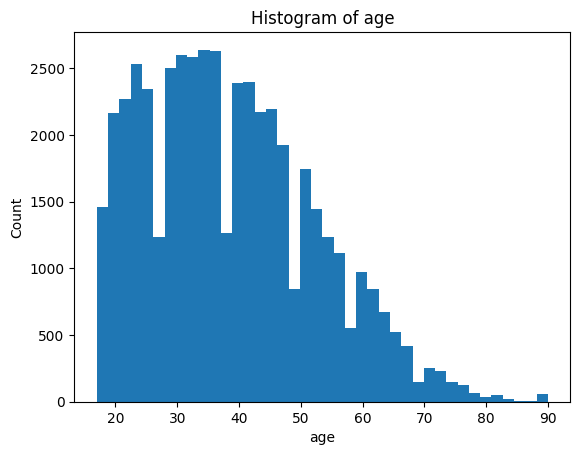

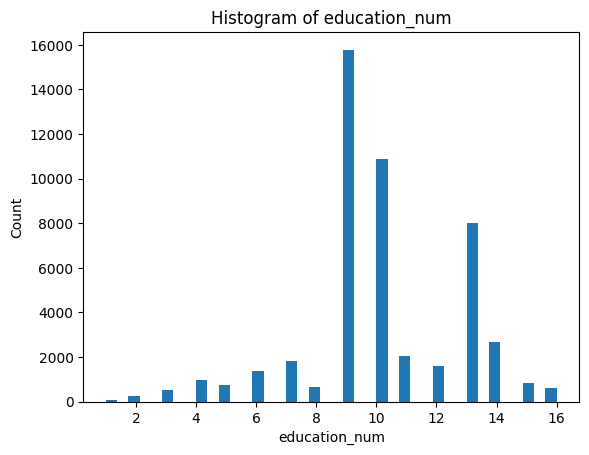

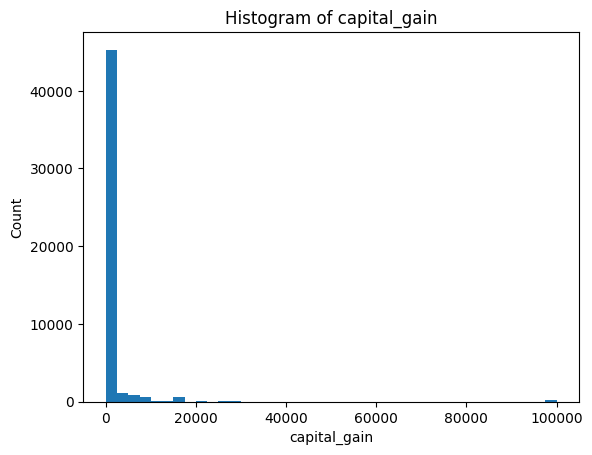

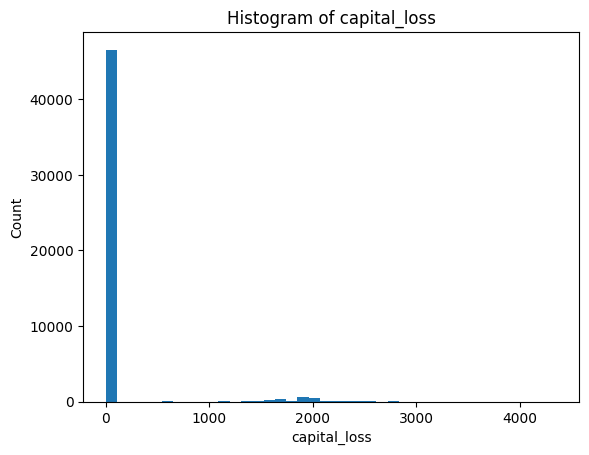

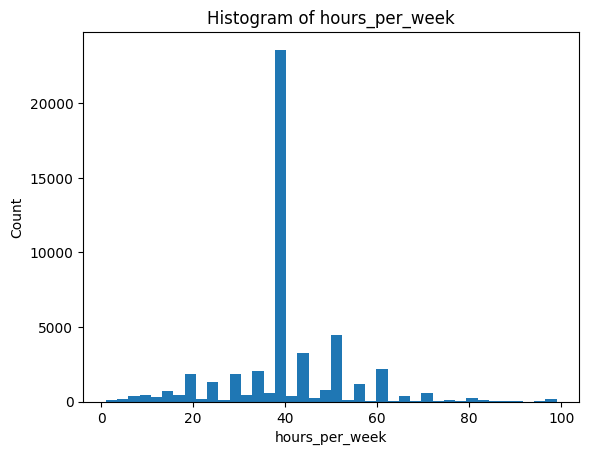

<Figure size 640x480 with 0 Axes>

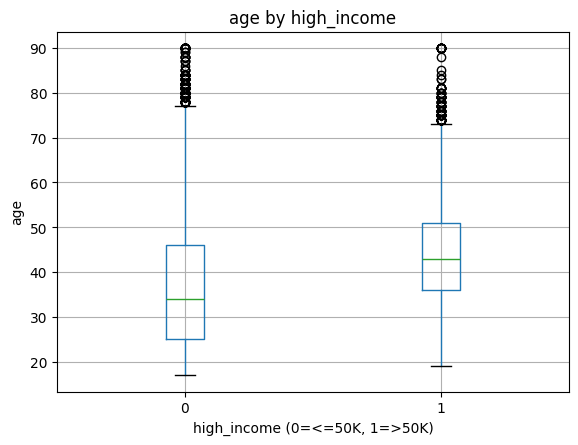

<Figure size 640x480 with 0 Axes>

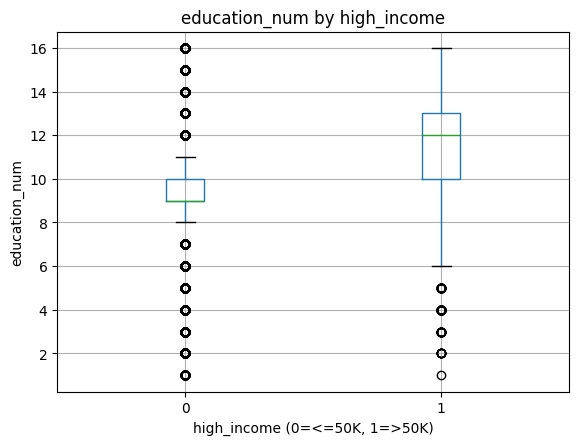

<Figure size 640x480 with 0 Axes>

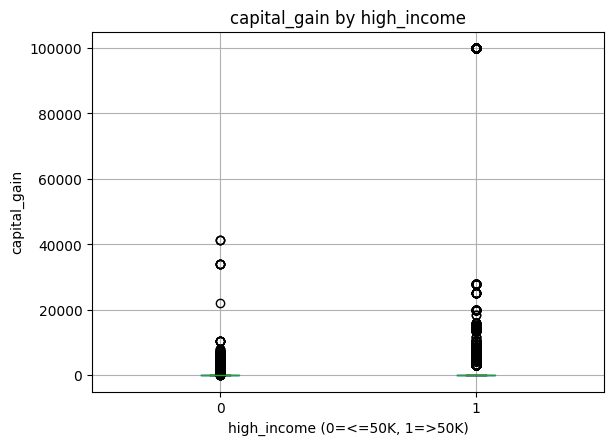

<Figure size 640x480 with 0 Axes>

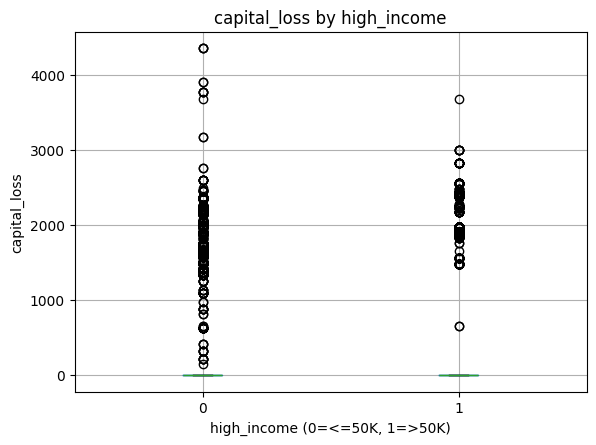

<Figure size 640x480 with 0 Axes>

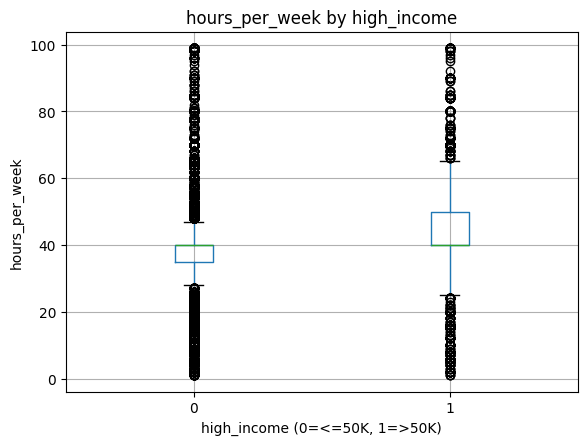

In [2]:
%pip install pandas numpy matplotlib scipy ipython

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import display



cols = [
    "age","workclass","fnlwgt","education","education_num","marital_status","occupation",
    "relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","income"
]

DATA_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
TEST_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

train = pd.read_csv(DATA_URL, header=None, names=cols, na_values="?", skipinitialspace=True)
test  = pd.read_csv(TEST_URL, header=0, names=cols, na_values="?", skipinitialspace=True)

# normalize test labels like '>50K.' -> '>50K'
def clean_income(x):
    return x.strip().replace(".", "") if isinstance(x, str) else x

for df in (train, test):
    df["income"] = df["income"].apply(clean_income)

data = pd.concat([train, test], ignore_index=True)

# convenience target
data["high_income"] = (data["income"] == ">50K").astype(int)

data.head()


# Create a binary "Bachelors or higher" flag
bachelor_plus = data["education"].isin(["Bachelors","Prof-school","Masters","Doctorate"]).astype(int)

# Build a 2x2 contingency table: rows=bachelor_plus, cols=high_income
ct = pd.crosstab(bachelor_plus, data["high_income"])
display(ct)

# Chi-square test of independence
chi2, p, dof, expected = stats.chi2_contingency(ct)
print(f"chi2={chi2:.3f}, dof={dof}, p-value={p:.3e}")


hours_low  = data.loc[data["high_income"]==0, "hours_per_week"].dropna()
hours_high = data.loc[data["high_income"]==1, "hours_per_week"].dropna()

# Welch's t-test (equal_var=False)
tstat, p = stats.ttest_ind(hours_low, hours_high, equal_var=False)

print(f"Welch t-test: t={tstat:.3f}, p-value={p:.3e}")
print("<=50K mean (sd, n):", hours_low.mean().round(2), hours_low.std(ddof=1).round(2), len(hours_low))
print(">50K  mean (sd, n):", hours_high.mean().round(2), hours_high.std(ddof=1).round(2), len(hours_high))

# Structure & missing values
data.info()
display(data.isna().sum().sort_values(ascending=False).head(10))

# Quick numeric summary
display(data.describe(include='all').T.head(20))

# A few simple plots (histograms + boxplots vs income)
numeric_cols = ["age","education_num","capital_gain","capital_loss","hours_per_week"]

for c in numeric_cols:
    plt.figure()
    plt.hist(data[c].dropna(), bins=40)
    plt.title(f"Histogram of {c}")
    plt.xlabel(c); plt.ylabel("Count")
    plt.show()

for c in numeric_cols:
    plt.figure()
    data.boxplot(column=c, by="high_income")
    plt.title(f"{c} by high_income"); plt.suptitle("")
    plt.xlabel("high_income (0=<=50K, 1=>50K)"); plt.ylabel(c)
    plt.show()






Explored the UCI Adult Income dataset, formed 2 hypothesis from EDA, and tested them using statistical methods.

TESTS:
1. Chi-square (association between education level and high income)
2. Welch's t-test (difference in mean hours/week by income group)


    -Source: UCI Adult (Census Income)

    -Target Variable: `income` recoded to `high_income` (1 if `>50k`, else 0)

    -Rows/Columns after concatenation:[fill in shape shown by `print(data.shape)` or data.info]
    
    -Basic Cleaning: trimmed strings, converted `?` to NaN, normalized test labels (e.g., `>50K.` → `>50K`).


**Structure & Missingness**  
- Top missing columns: [e.g., `workclass`, `occupation`, `native_country`] with counts: [fill in].  
- Numeric columns include: `age`, `education_num`, `capital_gain`, `capital_loss`, `hours_per_week`.  
- Categorical columns include: `education`, `marital_status`, `workclass`, `occupation`, `sex`, `race`, `relationship`, `native_country`.

**Distributions (from histograms/boxplots):**  
- `age`: [e.g., slightly right-skewed / centered around …].  
- `education_num`: [e.g., multimodal / clustered around …].  
- `capital_gain` and `capital_loss`: [e.g., heavy right-skew, mostly zeros].  
- `hours_per_week`: [e.g., center near 40, with some long-hour tails].

**Group Patterns (quick observations):**  
- `education` vs `high_income`: [e.g., higher share of `>50K` among Bachelor’s+].  
- `hours_per_week` vs `high_income`: [e.g., `>50K` group appears to work more hours on average].  
- Any other categorical signal you noticed: [e.g., `marital_status` or `occupation` differences].

**Caveats:**  
- Large N → small effects can become statistically significant; note **practical** significance.  
- Zero-inflation in `capital_gain`/`capital_loss` can distort mean-based comparisons.

## Hypotheses

### H1 — Education vs High Income (Chi-square test)
- **Research question:** Is having at least a Bachelor’s degree associated with earning `>50K`?  
- **Variables:**  
  - `bachelor_plus` (1 if `education ∈ {Bachelors, Prof-school, Masters, Doctorate}`, else 0)  
  - `high_income` (1 if `>50K`, else 0)  
- **H0 (null):** Education group and high income are **independent**.  
- **H1 (alt):** Education group and high income are **associated** (not independent).  
- **Test & rationale:** Chi-square test of independence on 2×2 table; both variables are categorical.  
- **Assumptions:** Expected cell counts sufficiently large; independent observations.

### H2 — Mean Hours per Week by Income (Welch’s t-test)
- **Research question:** Do people who earn `>50K` work a different average number of hours per week?  
- **Groups:** `high_income = 0` vs `high_income = 1` for `hours_per_week`.  
- **H0 (null):** Mean(`hours_per_week` | `>50K`) = Mean(`hours_per_week` | `<=50K`).  
- **H1 (alt):** Means differ.  
- **Test & rationale:** Welch’s two-sample t-test (`equal_var=False`), robust to unequal variances.  
- **Assumptions:** Approximately independent samples; large N helps with normality via CLT.

H1 — Chi-square (Education vs High Income)

Interpretation :
The chi-square test indicates a statistically significant association between having at least a Bachelor’s degree and earning >50K. The proportion of >50K earners is higher among the Bachelor’s+ group than among those without a Bachelor’s degree, which aligns with the EDA pattern. While the dataset is large, the direction of the difference is clear: higher education corresponds to a greater likelihood of high income. You can see this directly in the contingency table proportions.

H2 — Welch’s t-test (Hours/Week by Income)

Interpretation:
Welch’s t-test shows a statistically significant difference in mean weekly hours between the >50K and <=50K groups. On average, the >50K group works more hours per week than the <=50K group. Beyond significance, the practical effect is that higher earners work roughly more per week on average—consistent with the EDA boxplots. 